# PolynomialFeature algorithms

In [1]:
import pandas as pd

In [2]:
df=pd.DataFrame({'length':[10,12,14,10,11,13,20,25,10],
              'width':[12,13,13.5,10,10,11.5,5,7,3],
              'Target':["Apple","Apple","Apple","Guava","Guava","Guava","Banana","Banana","Banana"]})

In [3]:
df

,length,width,Target
0,10,12.0,Apple
1,12,13.0,Apple
2,14,13.5,Apple
3,10,10.0,Guava
4,11,10.0,Guava
5,13,11.5,Guava
6,20,5.0,Banana
7,25,7.0,Banana
8,10,3.0,Banana


In [4]:
pd.read_excel('C:/Users\Ducat\Desktop\Book1.xlsx',sheet_name='Sheet1')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users\\Ducat\\Desktop\\Book1.xlsx'

In [5]:
pd.read_excel('C:/Users\Ducat\Desktop\Book1.xlsx',sheet_name='Sheet2')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users\\Ducat\\Desktop\\Book1.xlsx'

In [6]:
df1=pd.read_excel('C:/Users\Ducat\Desktop\Book1.xlsx',sheet_name=['Sheet1','Sheet2'])
df1

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users\\Ducat\\Desktop\\Book1.xlsx'

In [ ]:
df1['Sheet1']

In [7]:
df1['Sheet2']

NameError: name 'df1' is not defined

In [8]:
df1=pd.read_excel('C:/Users\Ducat\Desktop\Book1.xlsx',sheet_name=[0,1])
df1

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users\\Ducat\\Desktop\\Book1.xlsx'

# feature and target

In [9]:
df


,length,width,Target
0,10,12.0,Apple
1,12,13.0,Apple
2,14,13.5,Apple
3,10,10.0,Guava
4,11,10.0,Guava
5,13,11.5,Guava
6,20,5.0,Banana
7,25,7.0,Banana
8,10,3.0,Banana


In [10]:
X=df.iloc[:,:-1].values    #feature always in 2D array 
X

array([[10. , 12. ],
       [12. , 13. ],
       [14. , 13.5],
       [10. , 10. ],
       [11. , 10. ],
       [13. , 11.5],
       [20. ,  5. ],
       [25. ,  7. ],
       [10. ,  3. ]])

In [11]:
df

,length,width,Target
0,10,12.0,Apple
1,12,13.0,Apple
2,14,13.5,Apple
3,10,10.0,Guava
4,11,10.0,Guava
5,13,11.5,Guava
6,20,5.0,Banana
7,25,7.0,Banana
8,10,3.0,Banana


In [12]:
y=df.iloc[:,-1].values   #target always in 1D array

In [13]:
y

array(['Apple', 'Apple', 'Apple', 'Guava', 'Guava', 'Guava', 'Banana',
       'Banana', 'Banana'], dtype=object)

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [15]:
sc=MinMaxScaler()
X_sc=sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,train_size=0.75, random_state=10)
model=LogisticRegression()
model.fit(X_train,y_train)
y_Train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print("Training score :",accuracy_score(X_train_pred,y_train))
print("Testing score :",accuracy_score(X_test_pred,y_test))

NameError: name 'X_train_pred' is not defined

# PolynomialFeature

In [18]:
poly=PolynomialFeatures(degree=2)
X_poly_feature=poly.fit_transform(X)
X_poly_feature


array([[  1.  ,  10.  ,  12.  , 100.  , 120.  , 144.  ],
       [  1.  ,  12.  ,  13.  , 144.  , 156.  , 169.  ],
       [  1.  ,  14.  ,  13.5 , 196.  , 189.  , 182.25],
       [  1.  ,  10.  ,  10.  , 100.  , 100.  , 100.  ],
       [  1.  ,  11.  ,  10.  , 121.  , 110.  , 100.  ],
       [  1.  ,  13.  ,  11.5 , 169.  , 149.5 , 132.25],
       [  1.  ,  20.  ,   5.  , 400.  , 100.  ,  25.  ],
       [  1.  ,  25.  ,   7.  , 625.  , 175.  ,  49.  ],
       [  1.  ,  10.  ,   3.  , 100.  ,  30.  ,   9.  ]])

In [19]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_poly_feature,y,train_size=0.75,random_state=10)

In [20]:
scale=MinMaxScaler()
X_train1_scale=scale.fit_transform(X_train1)
X_train1_scale

array([[0.        , 0.66666667, 0.        , 0.57142857, 0.        ,
        0.        ],
       [0.        , 0.        , 0.625     , 0.        , 0.        ,
        0.52083333],
       [0.        , 0.13333333, 1.        , 0.08380952, 0.74666667,
        1.        ],
       [0.        , 0.        , 0.875     , 0.        , 0.26666667,
        0.82638889],
       [0.        , 1.        , 0.25      , 1.        , 1.        ,
        0.16666667],
       [0.        , 0.06666667, 0.625     , 0.04      , 0.13333333,
        0.52083333]])

In [21]:
X_test1_scale=scale.transform(X_test1)
X_test1_scale

array([[ 0.        ,  0.        , -0.25      ,  0.        , -0.93333333,
        -0.11111111],
       [ 0.        ,  0.26666667,  1.0625    ,  0.18285714,  1.18666667,
         1.09201389],
       [ 0.        ,  0.2       ,  0.8125    ,  0.13142857,  0.66      ,
         0.74479167]])

In [22]:
model1=LogisticRegression()
model1.fit(X_train1_scale,y_train1)
model1.predict(X_train1_scale)
model1.predict(X_test1_scale)
print("Training score :",model1.score(X_train1_scale,y_train))
print("Testing score :",model1.score(X_test1_scale,y_test1))

Training score : 0.6666666666666666
Testing score : 0.3333333333333333


In [23]:
for i in range(10):
    print(f"================{i}====================")
    poly=PolynomialFeatures(degree=i)
    X_poly_feature=poly.fit_transform(X)
    sc=MinMaxScaler()
    X_sc=sc.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    y_Train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    print("Training score :",accuracy_score(X_train_pred,y_train))
    print("Testing score :",accuracy_score(X_test_pred,y_test))

================0====================


NameError: name 'X_train_pred' is not defined

KNN

LinearRegression

LogisticRegression

Smort

PolynomialFeature

Logistic Regression OVR and Multinomial

Decision Tree

Ensemble Learning 

Computer Vision

NLP

Unsupervise Learning 
    
    Clustering 
    
    Association

# Logistic Regression OVR and Multinomial

# LogisticRegression OVR(One vs Rest)

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv("Iris.csv")

In [26]:
from sklearn.datasets import load_iris

In [27]:
data=load_iris()

In [28]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
X=data['data']   # feature

In [30]:
y=data['target']   #target

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression(multi_class='ovr')

In [33]:
model.fit(X,y)

LogisticRegression(multi_class='ovr')

In [34]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
sample=[[2.3,1.2,2.1,0.9]]

In [36]:
model.predict(sample)

array([1])

In [37]:
prob=model.predict_proba(sample)
prob

array([[4.34294040e-01, 5.65415239e-01, 2.90720439e-04]])

In [38]:
import numpy as np

In [39]:
np.sum(prob)

1.0

In [40]:
model2=LogisticRegression(multi_class='multinomial',max_iter=200)

In [41]:
model2.fit(X,y)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [42]:
model2.predict(sample)

array([0])

In [43]:
model2.predict_proba(sample)

array([[8.78905070e-01, 1.21019028e-01, 7.59019913e-05]])

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
sc=MinMaxScaler()

In [46]:
X_sc=sc.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,random_state=42,train_size=0.7)

In [49]:
model3=LogisticRegression(multi_class='multinomial', max_iter=200)

In [50]:
model3.fit(X_train,y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [51]:
X_pred=model3.predict(X_train)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print("Training accuracy :",accuracy_score(X_pred,y_train))

Training accuracy : 0.9238095238095239


In [54]:
X_test_pred=model3.predict(X_test)

In [55]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [56]:
print("testing score :",accuracy_score(X_test_pred,y_test))

testing score : 0.9111111111111111


# Decision Tree

In [57]:
# How to get dataset from sklearn package

In [58]:
from sklearn.datasets import load_iris

In [59]:
data=load_iris()

In [60]:
X=data.data    # feature
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [61]:
y=data.target  # target

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [79]:
model=DecisionTreeClassifier()

In [80]:
model.fit(X,y)

DecisionTreeClassifier()

In [81]:
model.predict([[5.1, 3.5, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)

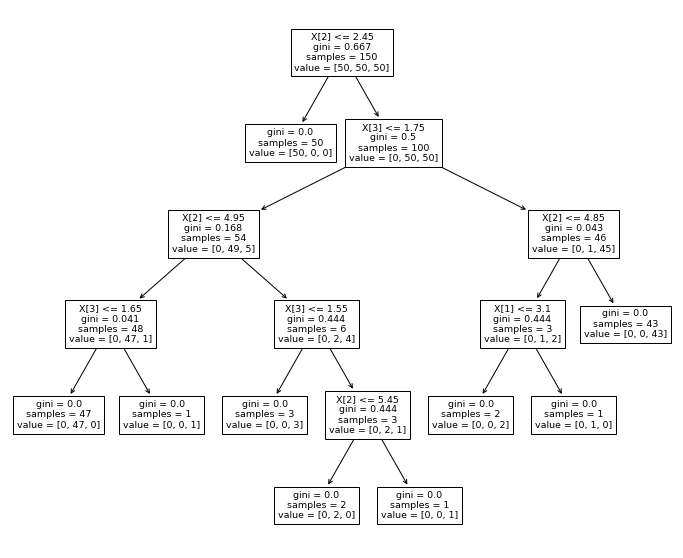

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plot_tree(model)
plt.show()

In [84]:
import pandas as pd

In [85]:
df=pd.read_csv("Iris.csv")

In [86]:
X=df.iloc[:,1:-1].values

In [87]:
y=df.iloc[:,-1].values

In [104]:
model=DecisionTreeClassifier(max_depth=3)

In [105]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=3)

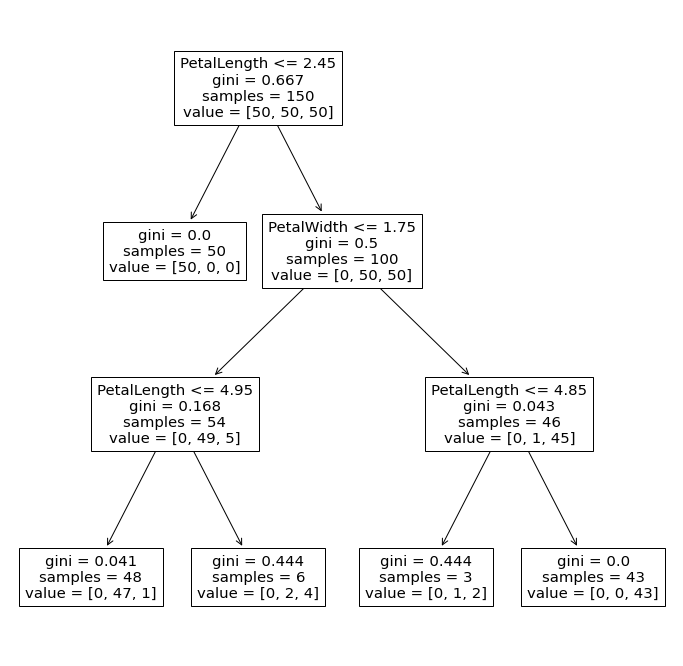

In [106]:
plt.figure(figsize=(12,12))
plot_tree(model, feature_names=['SepalLength','SepalWidth','PetalLength','PetalWidth'])
plt.show()

In [107]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
df=pd.read_csv("Salary_Data.csv")

In [112]:
X=df.iloc[:,:-1].values

In [114]:
y=df.iloc[:,-1].values

In [109]:
model=DecisionTreeRegressor()

In [115]:
model.fit(X,y)

DecisionTreeRegressor()

In [116]:
model.predict([[10]])

array([122391.])

In [117]:
model.predict([[11]])

array([121872.])

In [118]:
model.predict([[12]])

array([121872.])

In [121]:
model.predict([[13]])

array([121872.])

In [123]:
model.predict([[20]])

array([121872.])

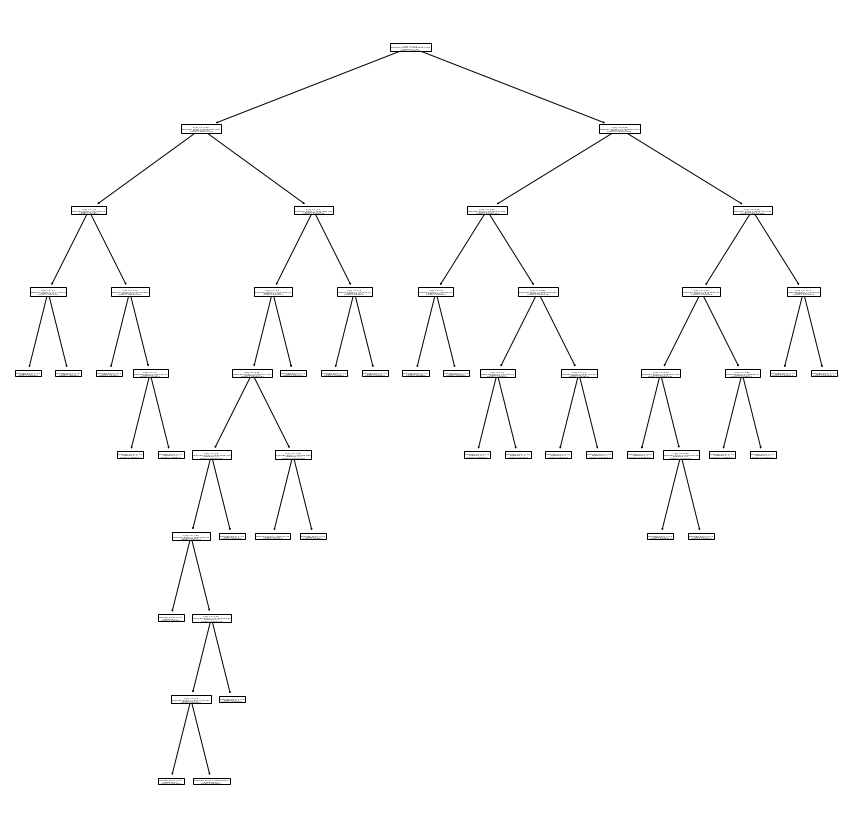

In [120]:
plt.figure(figsize=(15,15))
plot_tree(model)
plt.show()

# Ensemble learning 